<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
boston_df=boston_df.drop('Unnamed: 0',axis=1)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


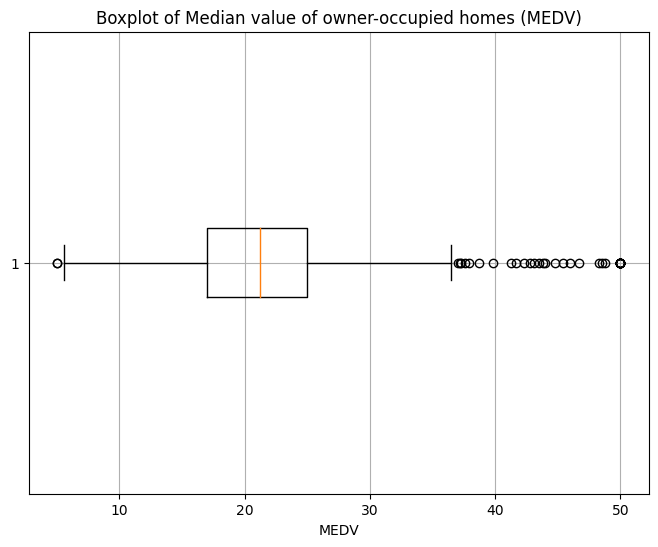

In [10]:
plt.figure(figsize=(8, 6))
plt.boxplot(boston_df['MEDV'], vert=False)
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('MEDV')
plt.grid(True)
plt.show()

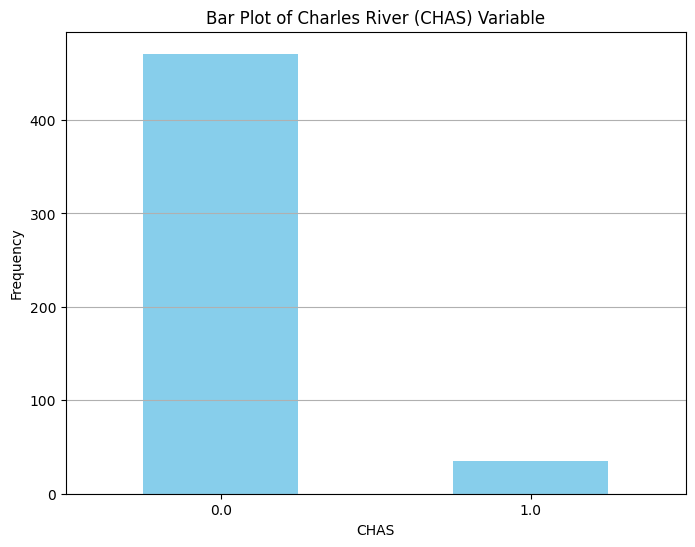

In [11]:
chas_counts = boston_df['CHAS'].value_counts()


plt.figure(figsize=(8, 6))
chas_counts.plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Charles River (CHAS) Variable')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.grid(axis='y')
plt.show()

<Figure size 1000x600 with 0 Axes>

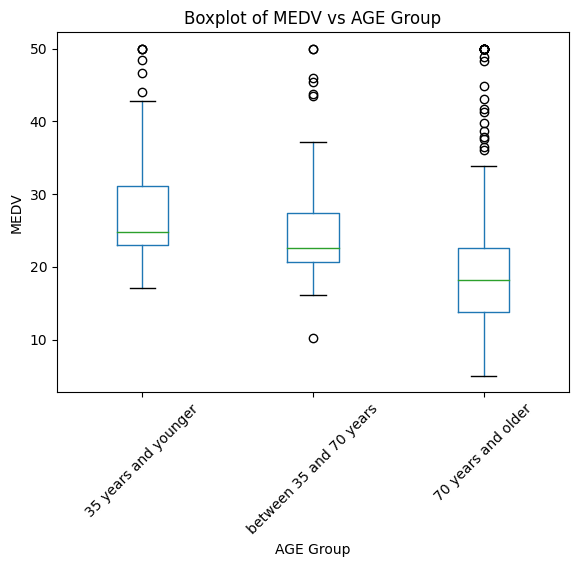

In [12]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])


plt.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='AGE_group', grid=False)
plt.title('Boxplot of MEDV vs AGE Group')
plt.suptitle('')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.xticks(rotation=45)
plt.show()

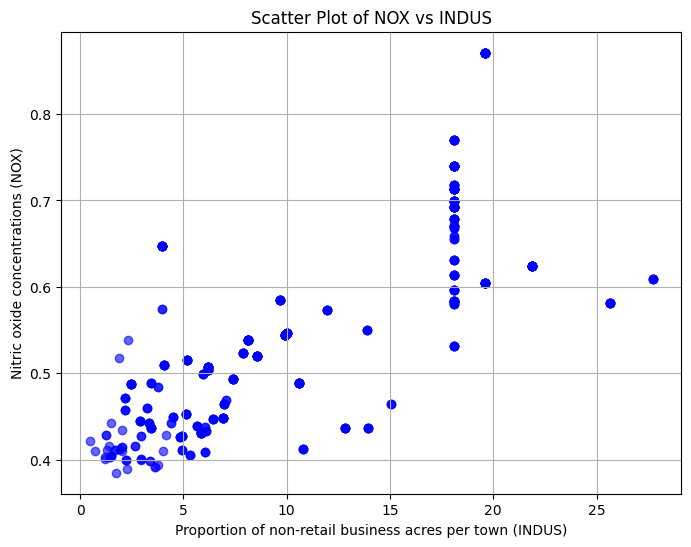

In [13]:
nox = boston_df['NOX']
indus = boston_df['INDUS']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(indus, nox, color='blue', alpha=0.6)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of non-retail business acres per town (INDUS)')
plt.ylabel('Nitric oxide concentrations (NOX)')
plt.grid(True)
plt.show()

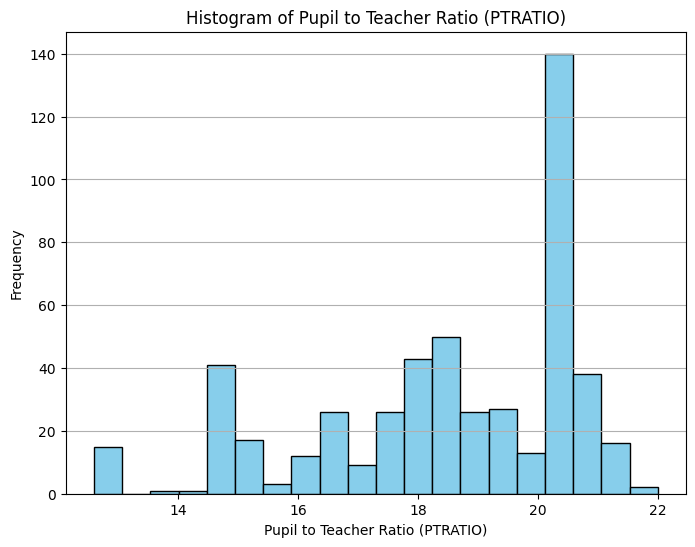

In [14]:
ptratio = boston_df['PTRATIO']


plt.figure(figsize=(8, 6))
plt.hist(ptratio, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [17]:
medv_charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_no_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_statistic, p_value = stats.ttest_ind(medv_charles, medv_no_charles)

# Define significance level
alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles river and those not bounded by it.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river and those not bounded by it.


In [18]:
anova_result = stats.f_oneway(boston_df[boston_df['AGE'] < 35]['MEDV'],
                              boston_df[(boston_df['AGE'] >= 35) & (boston_df['AGE'] < 70)]['MEDV'],
                              boston_df[boston_df['AGE'] >= 70]['MEDV'])

# Print the ANOVA result
print("ANOVA F-statistic:", anova_result.statistic)
print("ANOVA p-value:", anova_result.pvalue)

# Check if the p-value is less than alpha
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).")

ANOVA F-statistic: 36.40764999196599
ANOVA p-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940 (AGE).


In [19]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print correlation coefficient and p-value
print("Pearson correlation coefficient:", corr)
print("p-value:", p_value)

# Check if the p-value is less than alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis. There is no significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson correlation coefficient: 0.7636514469209192
p-value: 7.913361061210442e-98
Reject the null hypothesis. There is a significant linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [20]:
X = boston_df['DIS']  # Weighted distance to employment centers
X = sm.add_constant(X)  # Add a constant term for the intercept
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        02:45:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0